In [43]:
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from preprocessing import (find_missing_values, standardize, min_max_scaler, add_bias,
                           handle_one_hot_encoding, log_features, drop_corr_features,
                           make_cross_features)

from implementations import logistic_regression, logistic_loss
from helper import run_experiment, vizualisation

from utils import train_test_split, load_csv_data, predict_labels
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
DATA_TRAIN_PATH = '../data/train.csv'
y, X, _ = load_csv_data(DATA_TRAIN_PATH)
Y = y == 1

# Different reprocessing on logistic regression

### Raw data

In [27]:
def run(X_processed, gamma=0.2, test_size=0.2, epochs=100, step=20, verbose=False):
    X_train, y_train, X_test, y_test = train_test_split(X_processed, y=Y, test_size=test_size)
    initial_w = np.zeros(X_train.shape[1])
    losses_train, losses_test, acc, f1 = run_experiment(logistic_regression, 
                                                        X_train, y_train,
                                                        X_test, y_test,
                                                        logistic_loss, 
                                                        gamma, initial_w, epochs=epochs, step=step, verbose=verbose)
    vizualisation(losses_train, losses_test, acc, f1)

We have tried different types of preprocessing:
1. Scaling 

    a. Standart scaling
    
    b. Min-max scaling
    
2. Adding bias

3. One-hot encoding for cat. features and for -999 (undefined features)

4. Log features

5. 2-degree feature

6. cross-fetures


We figured out that without scaling the logistic regression doesn't converge, so we used scaling as base preprocessing method and try different features together with it. We didn't run logistic regresssion on raw data.

### Scaled data

#### Standart scale

100%|█████████████████████████████████████████| 100/100 [00:58<00:00,  1.72it/s]


Accuracy max: 0.72866, F1 max: 0.669594382646044


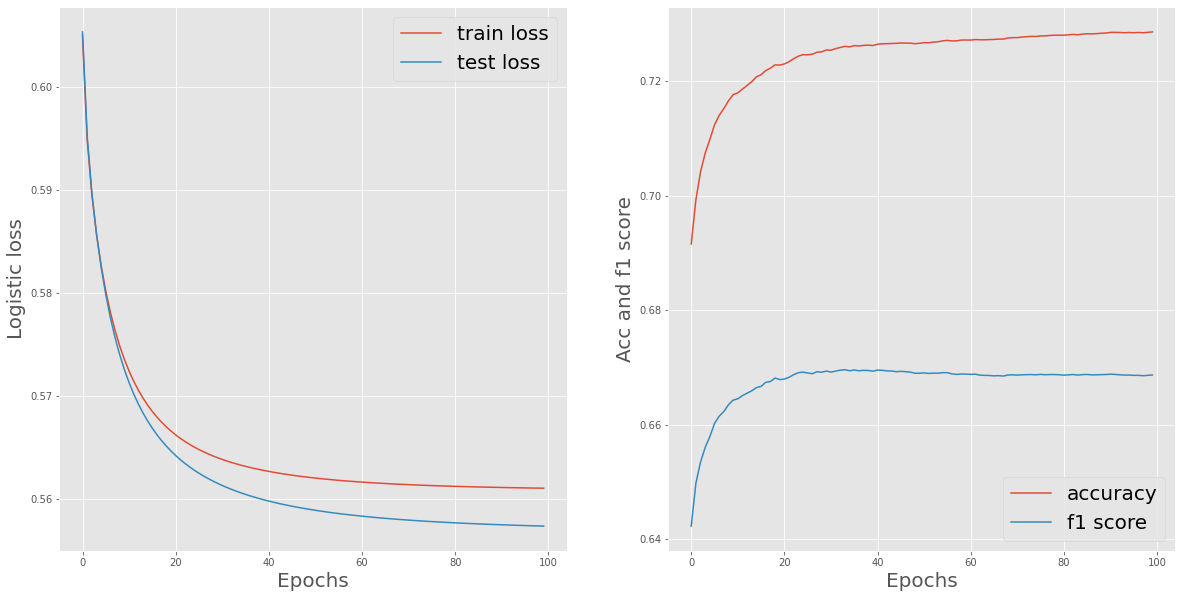

In [4]:
X_processed = standardize(X)
run(X_processed)

#### Min-max scaler

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/anastasiafilippova/EPFL/1_semester/ml-project-1-pasta_balalaika/experiments/../metrics.py:64: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2 * precision * recall) / (precision + recall)
100%|█████████████████████████████████████████| 100/100 [00:59<00:00,  1.67it/s]


Accuracy max: 0.69052, F1 max: nan


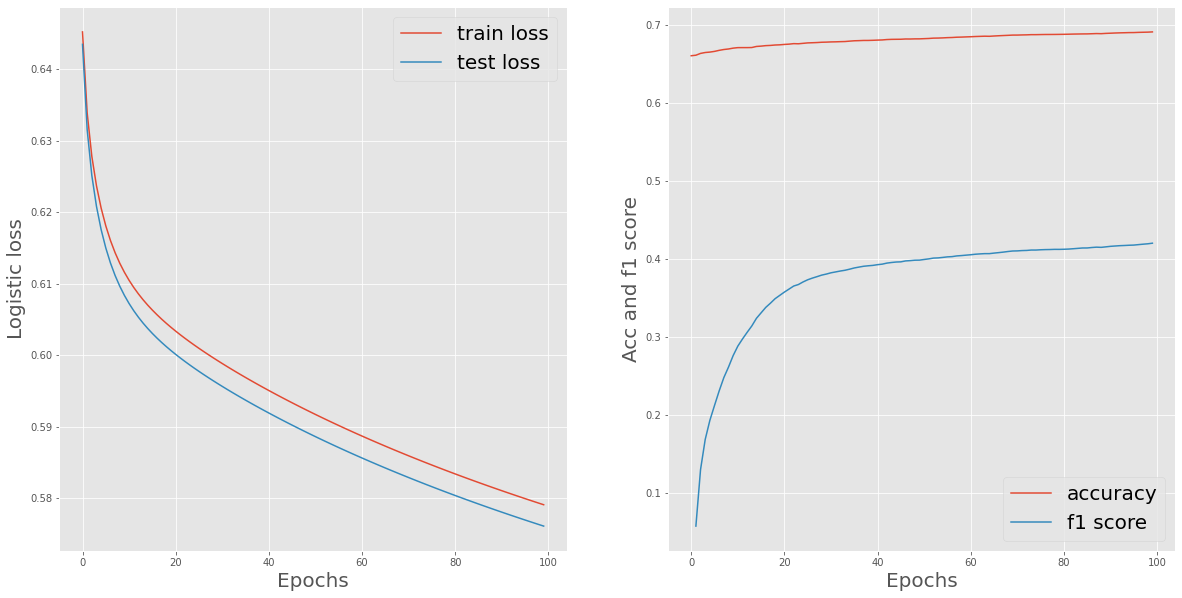

In [5]:
X_processed = min_max_scaler(X)
run(X_processed)

F1 metric is undefined for some reasons, however the accuracy score for standart scale is higher, so we will use standart scaling for data preprocessing.

### Standart scaling and adding bias

100%|█████████████████████████████████████████| 100/100 [01:42<00:00,  1.02s/it]


Accuracy max: 0.72606, F1 max: 0.54871051138155


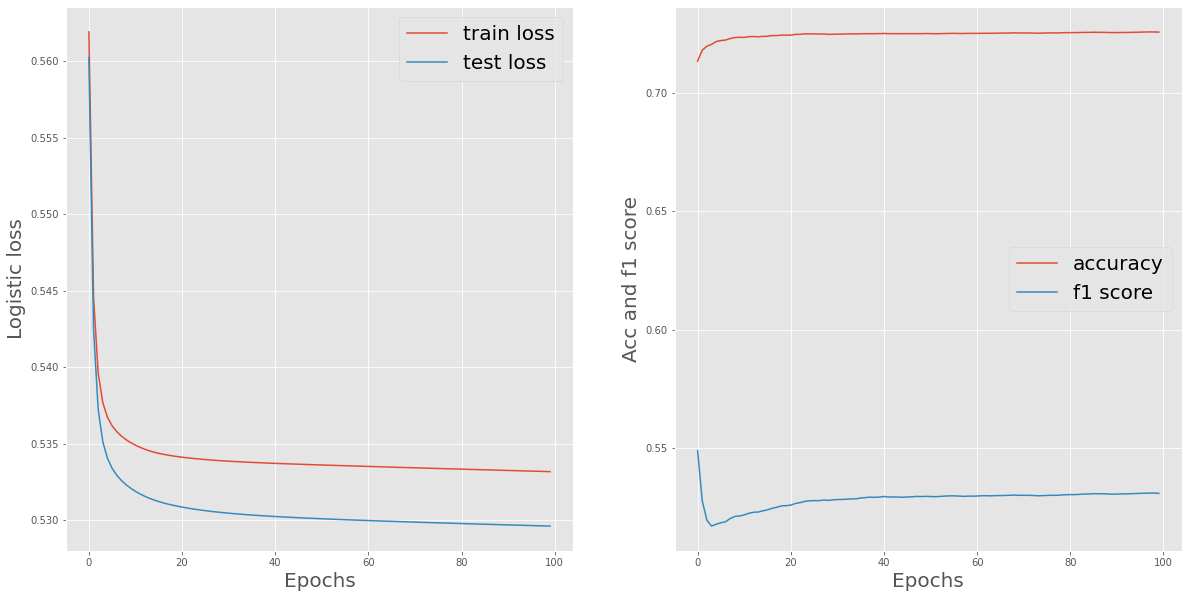

In [28]:
X_processed = standardize(X)
X_processed = add_bias(X_processed)
run(X_processed)

### Onehot of cat and onehot -999 + scaling

100%|█████████████████████████████████████████| 100/100 [01:20<00:00,  1.24it/s]


Accuracy max: 0.73304, F1 max: 0.6695353265573609


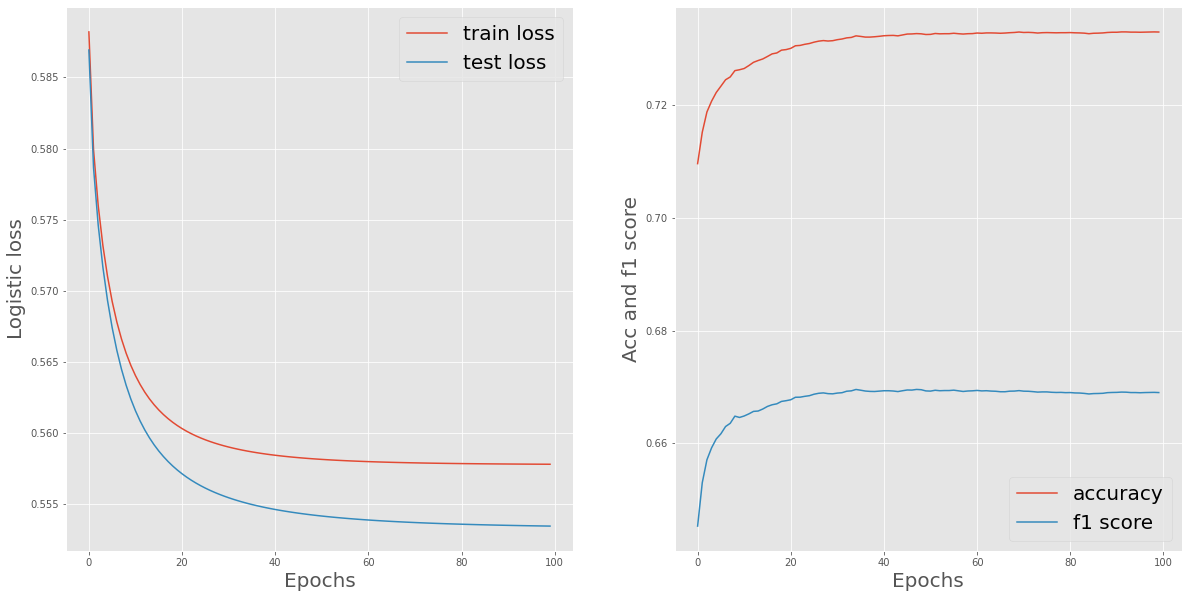

In [8]:
X_processed = handle_one_hot_encoding(X)
X_processed = standardize(X_processed)
run(X_processed)

### Onehot of cat and onehot -999 + scaling + adding bias

100%|█████████████████████████████████████████| 100/100 [01:38<00:00,  1.02it/s]


Accuracy max: 0.75566, F1 max: 0.6002159756536536


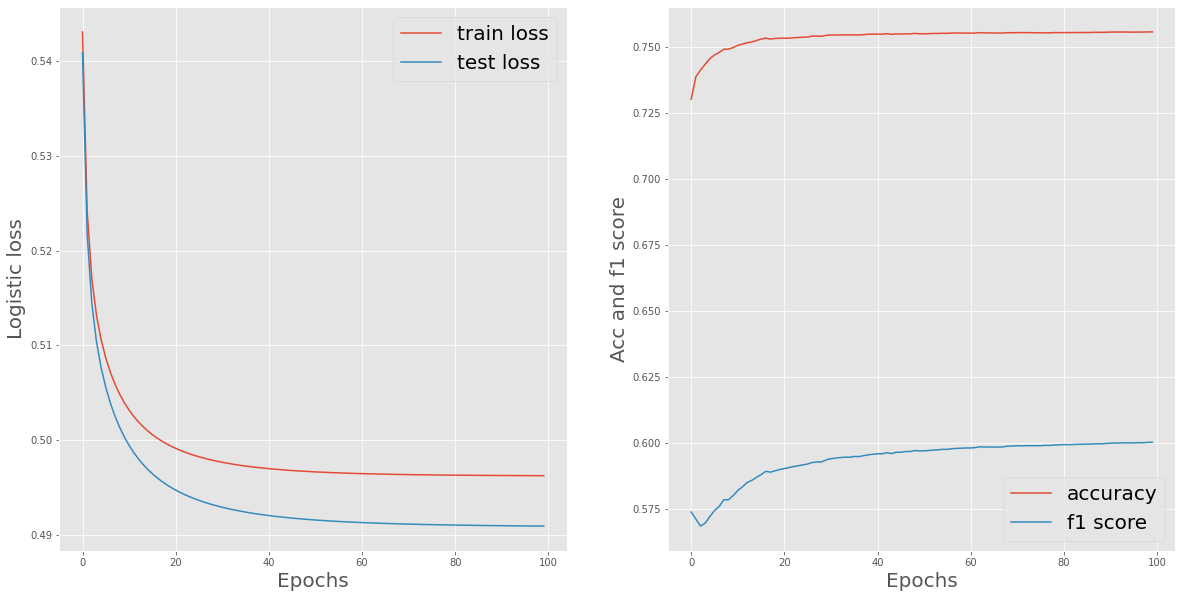

In [9]:
X_processed = handle_one_hot_encoding(X)
X_processed = standardize(X_processed)
X_processed = add_bias_bias(X_processed)
run(X_processed)

With bias the accuracy is higher than without, however the f1 score has opposite trend. 

### Scaling + log features

100%|█████████████████████████████████████████| 100/100 [01:17<00:00,  1.29it/s]


Accuracy max: 0.70398, F1 max: 0.6496580124488202


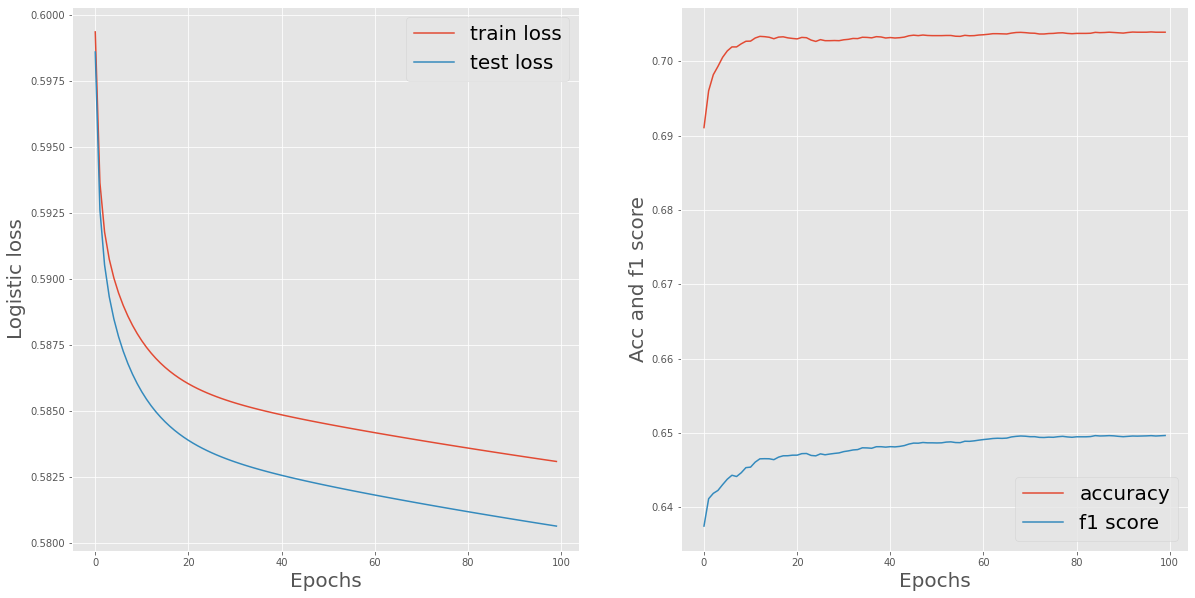

In [10]:
# X_processed = handle_one_hot_encoding(X)
X_processed = log_features(X)
X_processed = standardize(X_processed)
run(X_processed)

### Scaling + log features + adding bias

100%|█████████████████████████████████████████| 100/100 [01:33<00:00,  1.07it/s]


Accuracy max: 0.72606, F1 max: 0.54871051138155


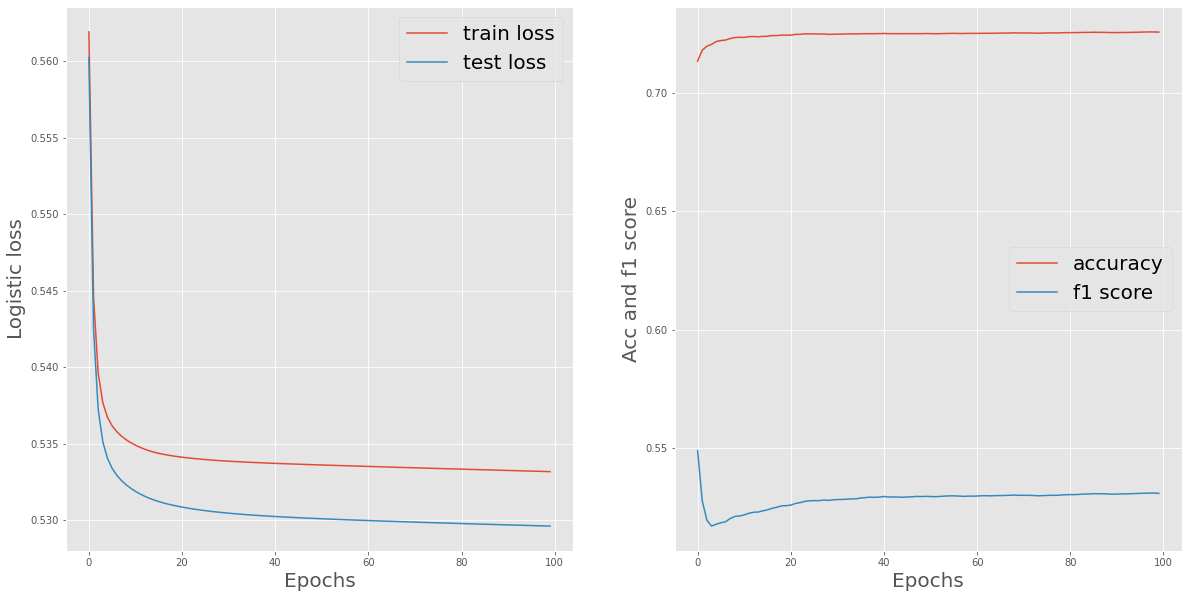

In [14]:
X_processed = log_features(X)
X_processed = standardize(X_processed)
X_processed = add_bias(X_processed)
run(X_processed)

### Onehot of cat and onehot -999 + scaling + log features

100%|█████████████████████████████████████████| 100/100 [01:16<00:00,  1.30it/s]


Accuracy max: 0.72204, F1 max: 0.6604403911336537


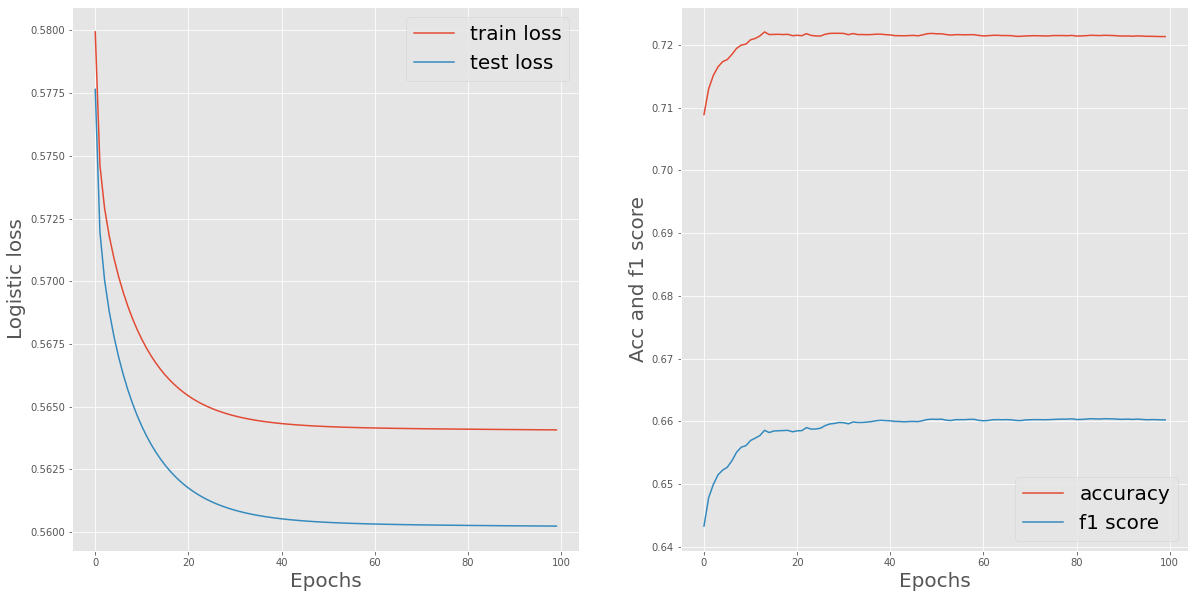

In [49]:
X_processed = handle_one_hot_encoding(X)
X_processed = log_features(X_processed)
X_processed = standardize(X_processed)
run(X_processed)

### Onehot of cat and onehot -999 + scaling + bias + log features

100%|█████████████████████████████████████████| 100/100 [03:00<00:00,  1.80s/it]


Accuracy max: 0.75754, F1 max: 0.6043141990014033


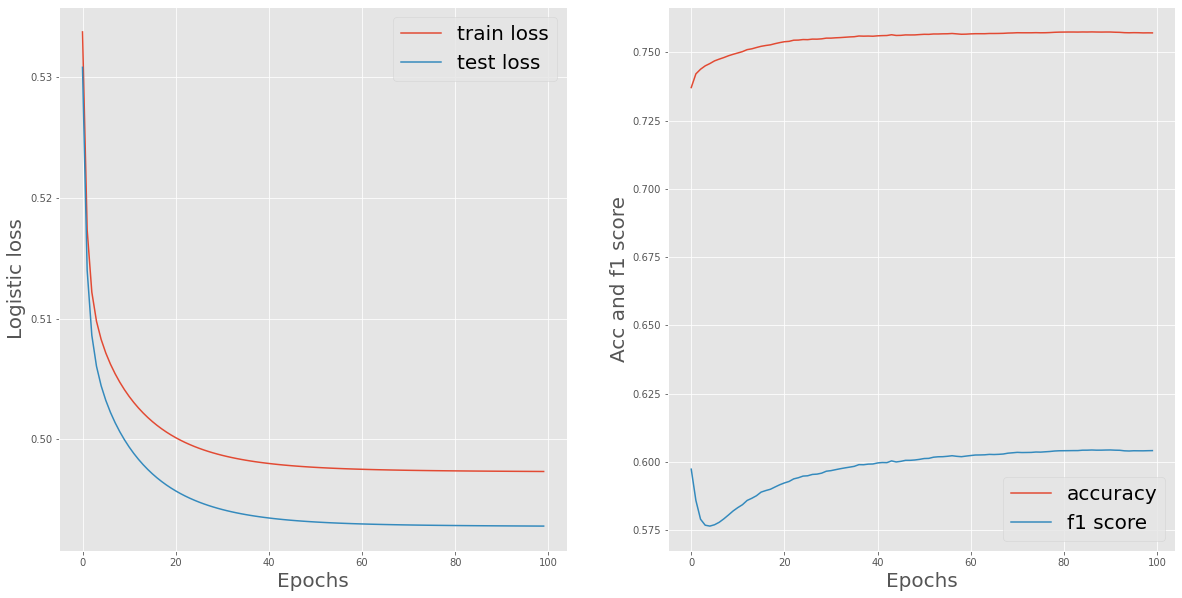

In [34]:
X_processed = handle_one_hot_encoding(X)
X_processed = log_features(X_processed)
X_processed = standardize(X_processed)
X_processed = add_bias(X_processed)
run(X_processed)

#### Summary: according to the results above log features give better accuracy score, so we fix 3 preprocessing methods:
- standart scaling
- adding bias (because accuracy is higher)
- log features
- one hot encoding

### Onehot of cat and onehot -999 + scaling + bias + log features + 2 degree

100%|█████████████████████████████████████████| 100/100 [04:00<00:00,  2.40s/it]


Accuracy max: 0.81604, F1 max: 0.7147199305254016


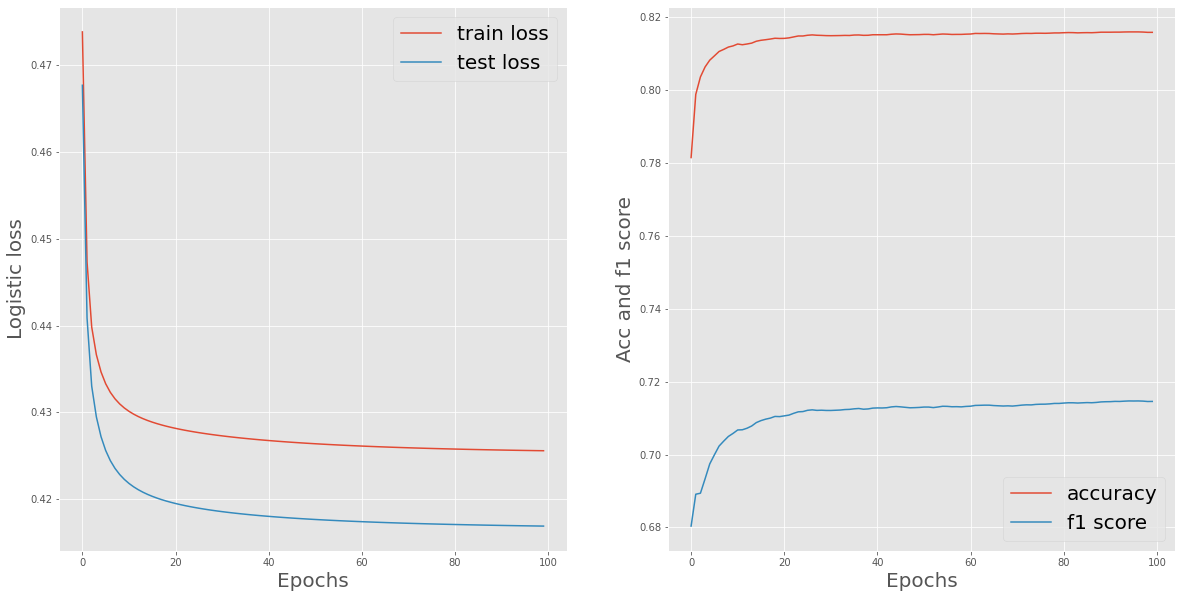

In [35]:
X_processed = handle_one_hot_encoding(X)
X_processed = log_features(X_processed)
X_processed = standardize(X_processed)
X_processed = np.hstack([X_processed, (X_processed) ** 2])
X_processed = add_bias(X_processed)

run(X_processed)

According to the above metrics 2 degree feature gives higher accuracy.

Let's try to drop features with high correlation:

### Onehot of cat and onehot -999 + scaling + bias + log features + drop_correlation+ 2 degree

100%|█████████████████████████████████████████| 100/100 [01:36<00:00,  1.04it/s]


Accuracy max: 0.81604, F1 max: 0.7147376256047636


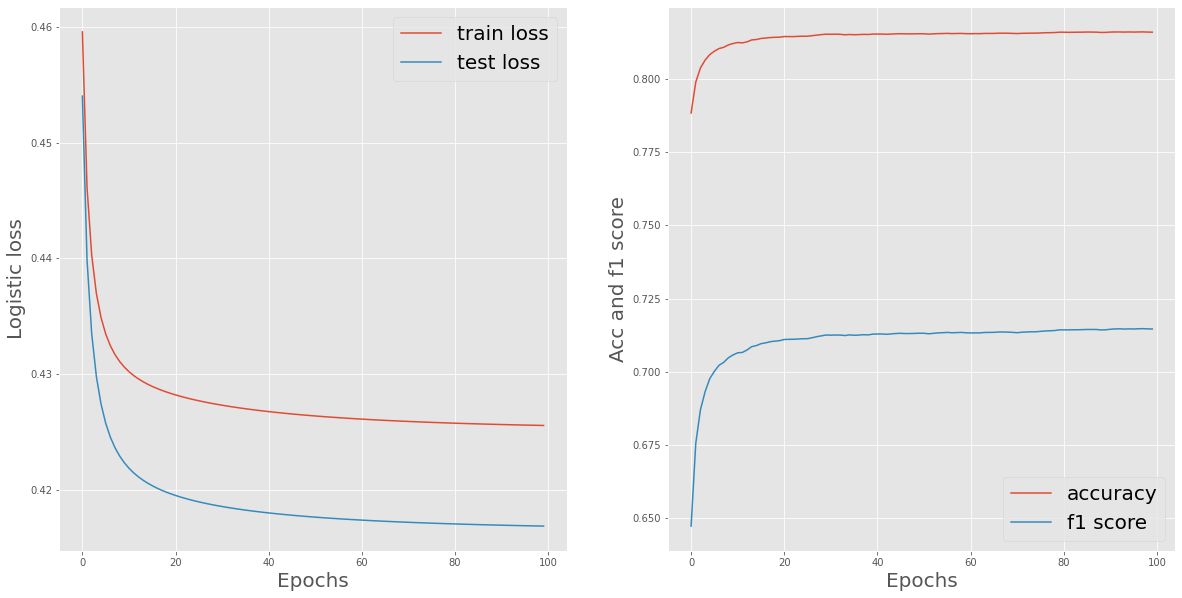

In [45]:
X_processed = handle_one_hot_encoding(X)
X_processed = log_features(X_processed)
X_processed = standardize(X_processed)
X_processed, _ = drop_corr_features(X_processed, threshold=0.8)
X_processed = np.hstack([X_processed, (X_processed) ** 2])
X_processed = add_bias(X_processed)

run(X_processed)

### Onehot of cat and onehot -999 + scaling + bias + log features  + cross features

100%|█████████████████████████████████████████| 100/100 [21:00<00:00, 12.61s/it]


Accuracy max: 0.83238, F1 max: 0.7433872152828802


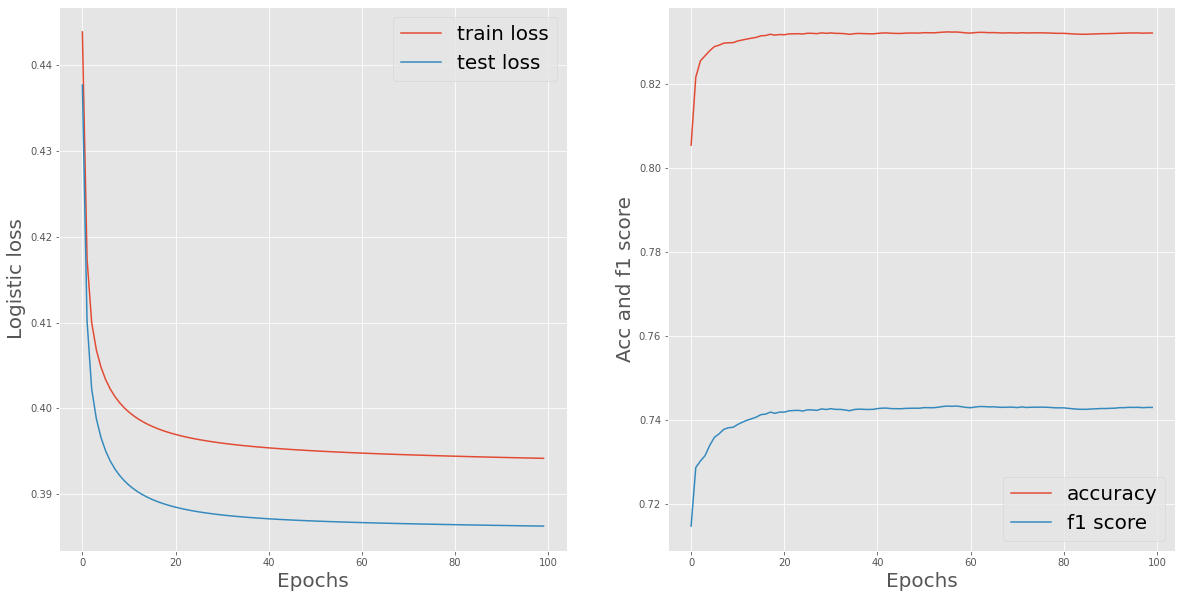

In [46]:
X_processed = handle_one_hot_encoding(X)
X_processed = log_features(X_processed)
X_processed = standardize(X_processed)
X_processed = make_cross_features(X_processed)
X_processed = add_bias(X_processed)

run(X_processed)

### Onehot of cat and onehot -999 + scaling + bias + log features  + drop corr features + cross features 

100%|█████████████████████████████████████████| 100/100 [20:38<00:00, 12.38s/it]


Accuracy max: 0.83228, F1 max: 0.7432490355765109


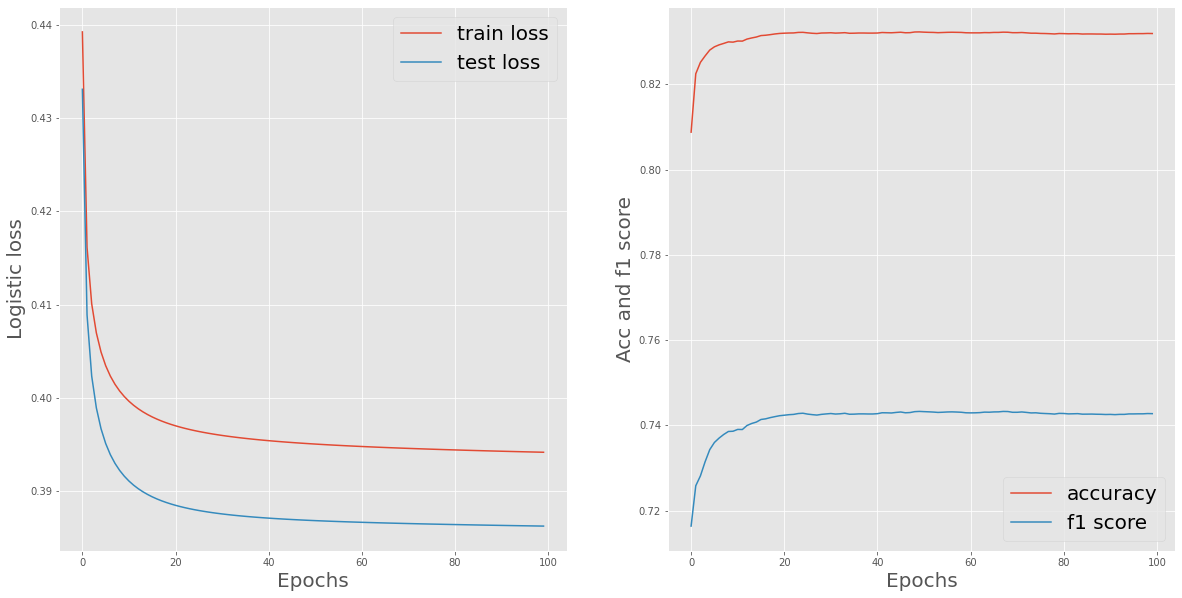

In [50]:
X_processed = handle_one_hot_encoding(X)
X_processed = log_features(X_processed)
X_processed = standardize(X_processed)
X_processed, _ = drop_corr_features(X_processed, threshold=0.9)
X_processed = make_cross_features(X_processed)
# X_processed = np.hstack([X_processed, (X_processed) ** 2])
X_processed = add_bias(X_processed)
run(X_processed, epochs=100, step=20)

### Onehot of cat and onehot -999 + scaling + bias + log features  + cross features + 2 degree

Too long experiment!

Summary: 
- standart scaling +, min_max scaling -
- adding bias +
- log features + 
    (despite the fact that f1 score it worse, we add log features because the accuracy score with them is higher)
- one-hot encoding +
- 2 degree -, cross features + 
- drop-corr features -

Also we run logistic regression with cross features and 2 degree, however the performance of model is approximately the same for cross features and for cross features+2 degree, but the training time is greater. Hense, we use only cross features.